<a href="https://colab.research.google.com/github/omkar1872/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("/content/IRIS (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
# Basic inspection
print(df.shape)
print(df.info())
print(df.describe())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

In [79]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [81]:
df['species']=df['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [82]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [83]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,int64


Class distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64


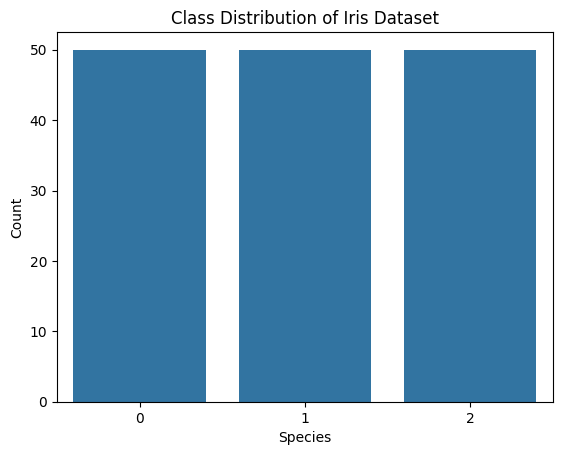

In [84]:
# Count of each class in the dataset
class_counts = df['species'].value_counts()
print("Class distribution:\n", class_counts)

# Visual representation
sns.countplot(data=df, x='species')
plt.title("Class Distribution of Iris Dataset")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


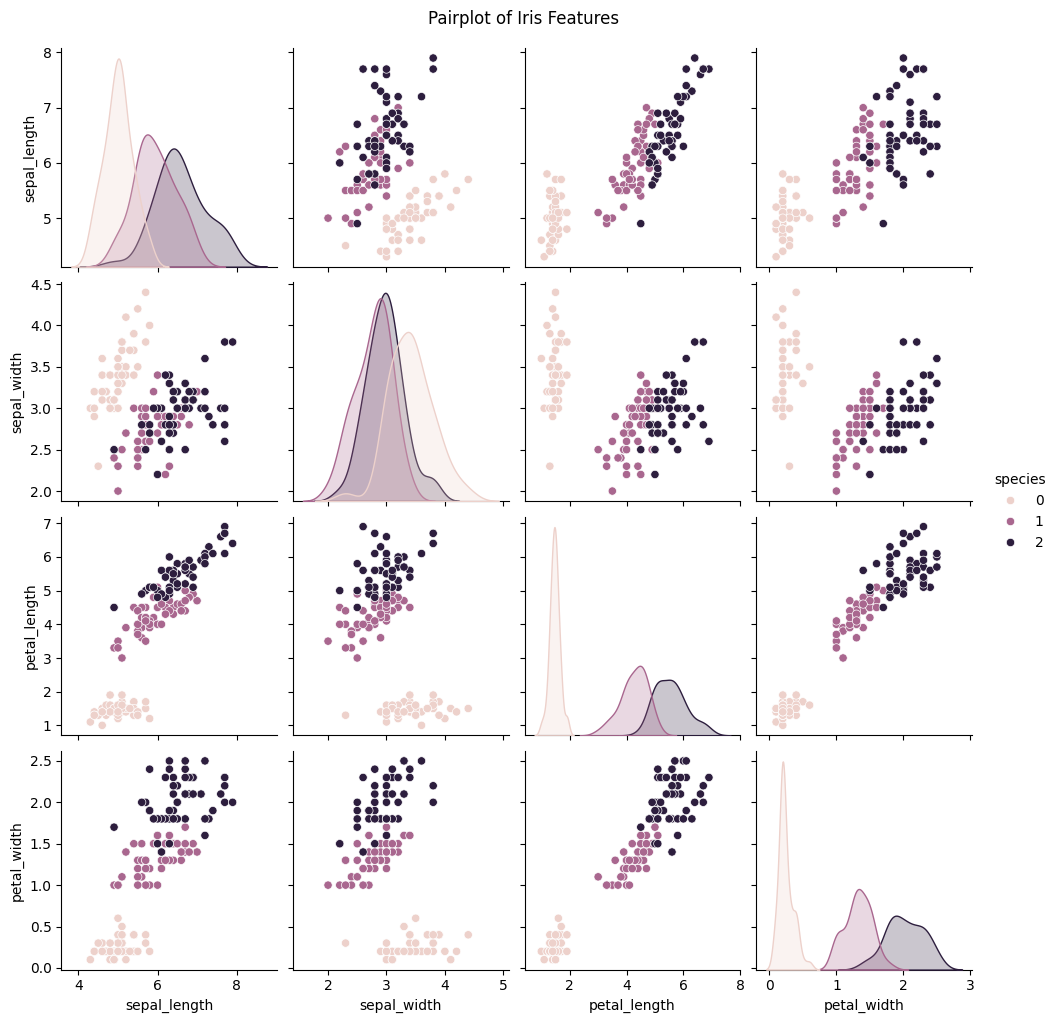

In [85]:
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


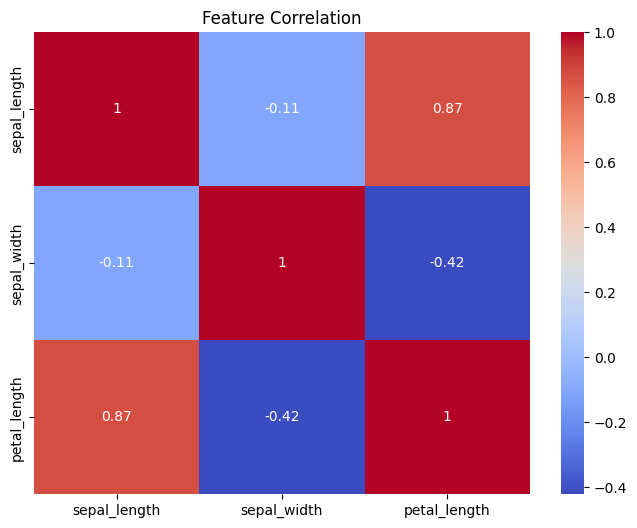

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [87]:
X=df.drop(columns=['species'])
Y=df['species']

In [88]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test,    Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [91]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, Y_train)


SVC()

In [92]:
y_pred = model.predict(X_test)


In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean accuracy: 0.9666666666666666


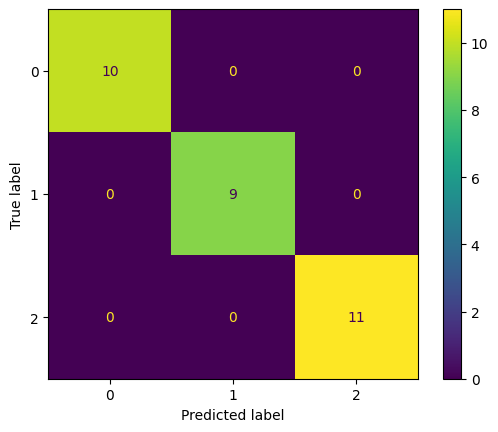

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [96]:
# Reverse mapping dictionary
species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(input_data)
    species_name = species_map[prediction[0]]
    return species_name

# Accept real-world inputs from user
try:
    sepal_length = float(input("Enter sepal length (cm): "))
    sepal_width = float(input("Enter sepal width (cm): "))
    petal_length = float(input("Enter petal length (cm): "))
    petal_width = float(input("Enter petal width (cm): "))

    species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
    print(f"\nPredicted Iris species: {species}")

except ValueError:
    print("Please enter valid numeric values.")


Enter sepal length (cm): 4
Enter sepal width (cm): 3
Enter petal length (cm): 1
Enter petal width (cm): 0.2

Predicted Iris species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
